<a href="https://colab.research.google.com/github/DIYAMOHANDASNT/ML-DAY-1/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files
files.upload()

Saving student_exam_data.csv to student_exam_data.csv


{'student_exam_data.csv': b'Study Hours,Previous Exam Score,Pass/Fail\n4.370861069626263,81.88970284118471,0\n9.556428757689245,72.16578198064722,1\n7.587945476302646,58.571656977179664,0\n6.387926357773329,88.82770118241692,1\n2.4041677639819286,81.08387035323275,0\n2.403950683025824,49.75701636069348,0\n1.5227525095137953,94.65563106963054,0\n8.795585311974417,89.35223457539014,1\n6.41003510568888,96.98799479751544,1\n7.372653200164409,83.5431705033016,1\n1.185260448662222,76.80491175614739,0\n9.72918866945795,65.09458217743713,1\n8.491983767203795,95.9637090012408,1\n2.9110519961044856,91.9638333700245,0\n2.636424704863906,42.713120206371364,0\n2.650640588680904,41.58201846983512,0\n3.7381801866358395,62.58780201268297,0\n5.72280788469014,88.63319984690997,1\n4.887505167779041,99.23656775889667,0\n3.6210622617823773,49.02501346621169,0\n6.506676052501415,75.6478429211281,1\n2.2554447458683766,62.85345139786129,0\n3.629301836816963,98.19486386887618,0\n4.297256589643226,90.5271353881

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv("student_exam_data.csv")
df

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


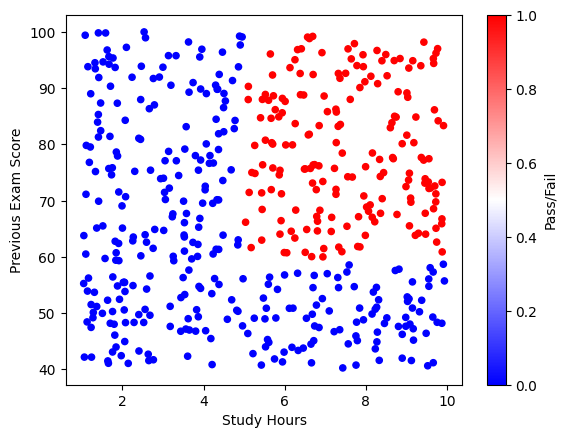

In [25]:
x = df["Study Hours"]
y = df["Previous Exam Score"]
df.plot.scatter(x="Study Hours",y="Previous Exam Score",c="Pass/Fail",colormap='bwr')
plt.show()

In [26]:
def sigmoid(z):

    return 1 / (1+ np.exp(-z))

In [27]:
def logistic_regression(all_x,all_y,m,b):
    for x,y_actual in zip(all_x,all_y):
        y_pred = sigmoid(m*x+b)
        error = y_pred - y_actual

        delta_m = -1 * (error * x) * 0.05
        delta_b = -1 * (error) * 0.05

        m = m + delta_m
        b = b + delta_b

    return m,b

In [28]:
m = 0
b = 0
for i in range(0,100):
    m,b = logistic_regression(x,y,m,b)
m,b

(932851.6978801256, 169792.7341609381)

In [29]:
### Helper function use when needed
def get_sigmoid(X,m,b):
    sig = []
    for x in X.values:
        y = sigmoid(m*x + b)
        sig.append(y)

    return sig

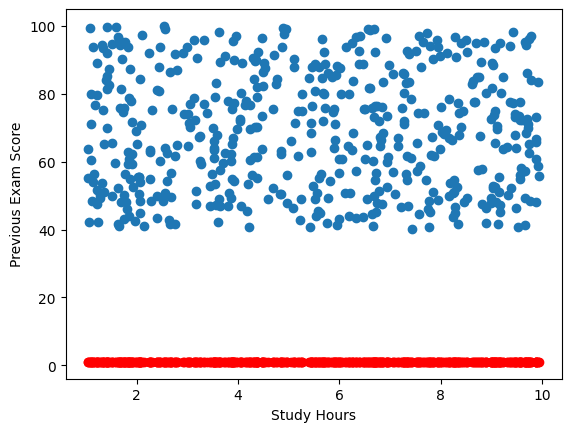

In [30]:
plt.plot(x,y,'o')
plt.xlabel("Study Hours")
plt.ylabel("Previous Exam Score")

sig = get_sigmoid(x,m,b)
plt.plot(x,sig,'ro')
plt.show()

In [35]:
def predict(x,m,b):
    y = sigmoid(m*x + b)

    if y > 0.5:
        return 1
    else:
        return 0

df["Predictions"] = df.apply(lambda row: predict(row["Study Hours"],m,b),axis=1)
df

,Study Hours,Previous Exam Score,Pass/Fail,Predictions
0,4.370861,81.889703,0,1
1,9.556429,72.165782,1,1
2,7.587945,58.571657,0,1
3,6.387926,88.827701,1,1
4,2.404168,81.083870,0,1
...,...,...,...,...
495,4.180170,45.494924,0,1
496,6.252905,95.038815,1,1
497,1.699612,48.209118,0,1
498,9.769553,97.014241,1,1
